# Data Challenge for Insight Health Data Science

### Employee Retention Problem

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

# 1) Exploration

Read all variables from file.

Make sure the employee ID and Salary are read as int.

In [4]:
employee_df = pd.read_csv('employee_retention_data.csv', dtype={'employee_id': np.int64, 'salary': np.int64}, parse_dates=['join_date','quit_date'])
# employee_df = pd.read_csv('employee_retention_data.csv', dtype={'employee_id': np.int64, 'salary': np.int64})

In [6]:
employee_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04
2,927315,4,marketing,14,101000,2014-10-13,NaT
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22


In [7]:
employee_df.describe()

,employee_id,company_id,seniority,salary
count,24702.000000,24702.000000,24702.000000,24702.000000
mean,501604.403530,3.426969,14.127803,138183.345478
std,288909.026101,2.700011,8.089520,76058.184573
min,36.000000,1.000000,1.000000,17000.000000
25%,250133.750000,1.000000,7.000000,79000.000000
50%,500793.000000,2.000000,14.000000,123000.000000
75%,753137.250000,5.000000,21.000000,187000.000000
max,999969.000000,12.000000,99.000000,408000.000000


Looking at the database, we have a total of 24702 sample points in the database

In [8]:
employee_df.dtypes

employee_id             int64
company_id              int64
dept                   object
seniority               int64
salary                  int64
join_date      datetime64[ns]
quit_date      datetime64[ns]
dtype: object

Do we have repeat employees?

In [9]:
len(employee_df)==len(employee_df.employee_id.unique())

True

Do the seniority values make sense?

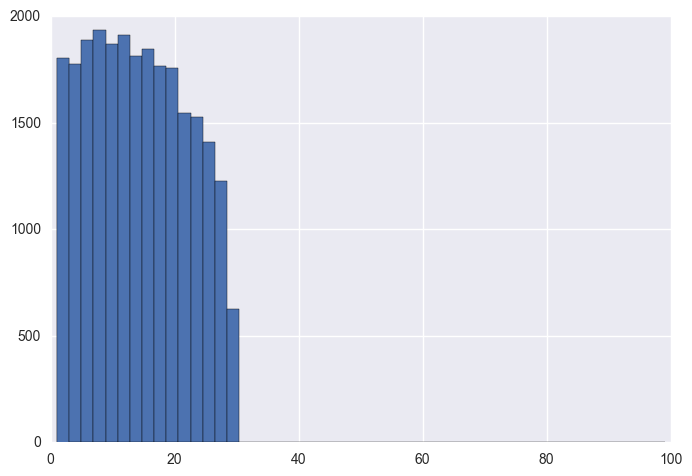

In [10]:
employee_df.seniority.hist(bins=50)

Seems like some employees have seniority values that make no sense.

Let's eliminate these data points.

In [11]:
np.sort( employee_df.seniority.unique() )[::-1]

array([99, 98, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [12]:
indsTemp= employee_df.seniority > 90
employee_df[indsTemp]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289,10,engineer,98,266000,2011-12-13,2015-01-09
24701,604052,1,marketing,99,185000,2011-07-26,2013-12-06


In [13]:
employee_df= employee_df[np.logical_not(indsTemp)]

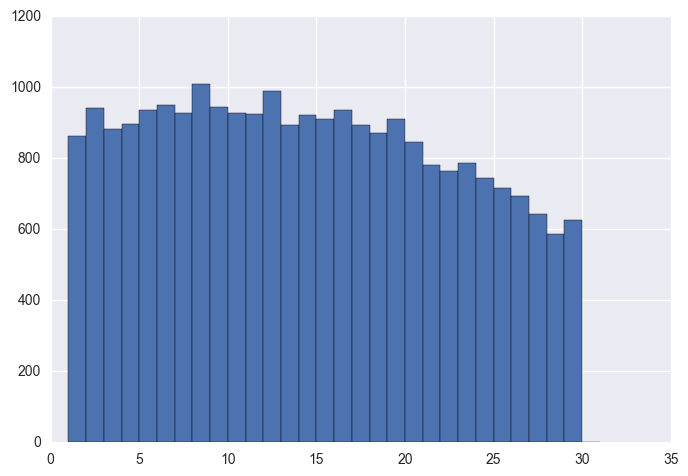

In [14]:
employee_df.seniority.hist(bins=np.arange(0,32))

It's interesting that there's a sudden cutoff for new employees with 30+ years of experience

I would expect a more gradual decrease, as different people would have different years of experience before retiring

What do the average salary values look like?

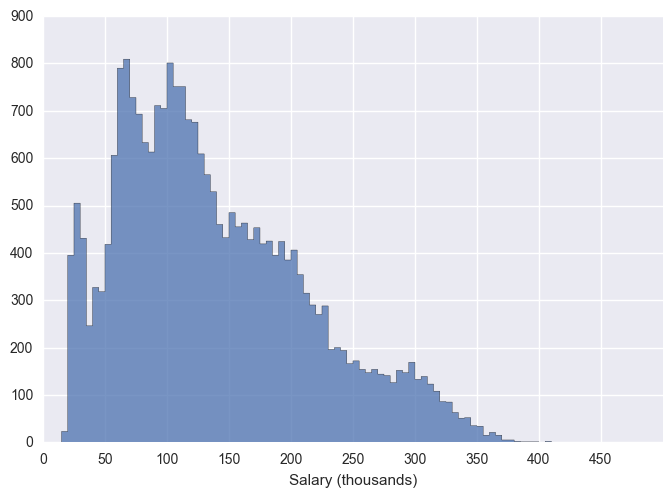

In [12]:
employee_df.salary.hist(bins=np.arange(0,500000,5000), histtype='stepfilled',alpha=0.75)
plt.xticks(np.arange(0,500000,50000),np.arange(0,500,50));
plt.xlabel('Salary (thousands)')

How many companies are there?

In [13]:
print np.sort( employee_df.company_id.unique() )
print 'There are %d companies in this database' % len( employee_df.company_id.unique() )

[ 1  2  3  4  5  6  7  8  9 10 11 12]
There are 12 companies in this database


In [14]:
company_nemp= employee_df.groupby('company_id')['employee_id'].count()
company_nemp

company_id
1     8485
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     864
11      16
12      24
Name: employee_id, dtype: int64

Companies 11 and 12 have barely any employees

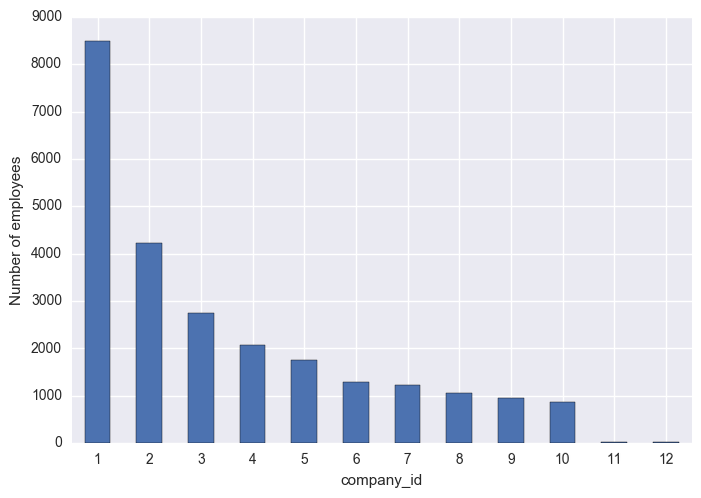

In [15]:
company_nemp.plot(kind='bar',rot=True)
plt.ylabel('Number of employees')

Do the different departments vary with the companies?

In [16]:
employee_df.dept.unique()

array(['customer_service', 'marketing', 'data_science', 'engineer',
       'sales', 'design'], dtype=object)

In [17]:
temp_df= pd.crosstab(employee_df['dept'], employee_df['company_id'], margins=True)
temp_df

company_id,1,2,3,4,5,6,7,8,9,10,11,12,All
dept,,,,,,,,,,,,,
customer_service,3157,1548,1010,777,635,503,469,385,342,336,6,12,9180
data_science,1079,568,347,279,216,153,153,146,134,109,2,4,3190
design,499,223,141,107,108,77,70,53,60,41,0,1,1380
engineer,1568,829,516,376,315,221,227,191,188,171,6,4,4612
marketing,1084,541,372,269,226,175,141,135,124,96,2,1,3166
sales,1098,513,363,254,255,162,164,137,113,111,0,2,3172
All,8485,4222,2749,2062,1755,1291,1224,1047,961,864,16,24,24700


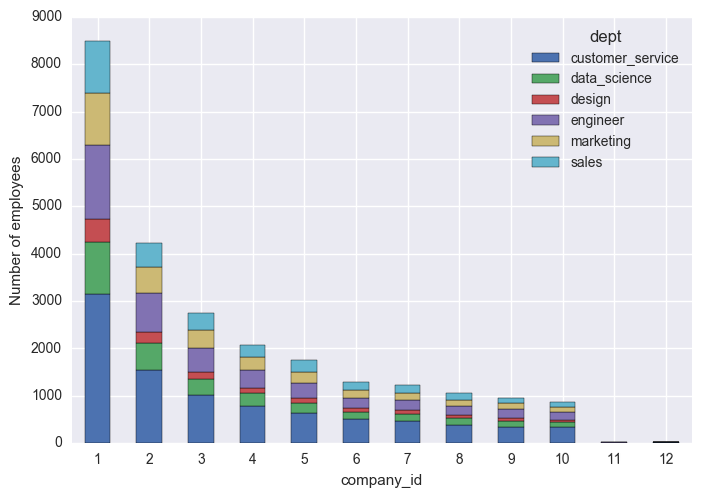

In [18]:
temp_df.transpose().iloc[:-1,:-1].plot(kind='bar', stacked=True, rot=True)
plt.ylabel('Number of employees')

In [19]:
def percConvert(ser):
    return ser/float(ser[-1])

In [20]:
temp_perc_df= temp_df.apply(percConvert)
temp_perc_df

company_id,1,2,3,4,5,6,7,8,9,10,11,12,All
dept,,,,,,,,,,,,,
customer_service,0.372068,0.366651,0.367406,0.376819,0.361823,0.389620,0.383170,0.367717,0.355879,0.388889,0.375,0.500000,0.371660
data_science,0.127166,0.134533,0.126228,0.135306,0.123077,0.118513,0.125000,0.139446,0.139438,0.126157,0.125,0.166667,0.129150
design,0.058810,0.052819,0.051291,0.051891,0.061538,0.059644,0.057190,0.050621,0.062435,0.047454,0.000,0.041667,0.055870
engineer,0.184797,0.196352,0.187705,0.182347,0.179487,0.171185,0.185458,0.182426,0.195630,0.197917,0.375,0.166667,0.186721
marketing,0.127755,0.128138,0.135322,0.130456,0.128775,0.135554,0.115196,0.128940,0.129032,0.111111,0.125,0.041667,0.128178
sales,0.129405,0.121506,0.132048,0.123181,0.145299,0.125484,0.133987,0.130850,0.117586,0.128472,0.000,0.083333,0.128421
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000


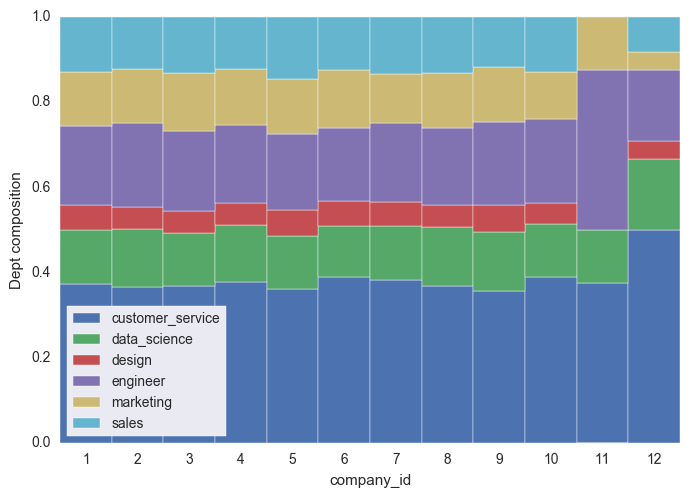

In [21]:
temp_perc_df.transpose().iloc[:-1,:-1].plot(kind='bar', stacked=True, rot=True, width=1, edgecolor='w')
plt.xlim(-0.5,11.5)
plt.ylabel('Dept composition')
plt.legend(loc='best',frameon=True)

Do the datetimes make sense?

In [22]:
# employee_df.join_date= pd.to_datetime(employee_df.join_date)
# employee_df.quit_date= pd.to_datetime(employee_df.quit_date)

Is any quit date before the join date?

In [23]:
(employee_df.quit_date <= employee_df.join_date).sum()

0

Number of employees still in the companies

In [24]:
employee_df.quit_date.isnull().sum()

11192

In [25]:
employee_df.join_date.isnull().sum()

0

# 2) Number of employees in each company by day

In [66]:
startdate= pd.datetime(2011,01,23)
enddate= pd.datetime(2015,12,13)

In [67]:
print 'Min and max of the join date values'
print 'min:', employee_df.join_date.min()
print 'max:', employee_df.join_date.max()

Min and max of the join date values
min: 2011-01-24 00:00:00
max: 2015-12-10 00:00:00


In [68]:
print 'Min and max of the quit date values'
print 'min:', employee_df.quit_date.min()
print 'max:', employee_df.quit_date.max()

Min and max of the quit date values
min: 2011-10-13 00:00:00
max: 2015-12-09 00:00:00


In [69]:
dates= pd.date_range(start=startdate, end=enddate)
companies= np.sort(employee_df.company_id.unique())

In [70]:
headcount_df= pd.DataFrame()
for comp in companies:
    print 'Company id:', comp

    # Create a temporary dataframe to count all new employees and all employees that quit
    temp_df= pd.DataFrame()
    temp_df['day']= dates
    temp_df['company_id']= [comp]*len(dates)

    joins= []
    quits= []
    for date in dates:
        inds_joins= (employee_df.join_date <= date) & (employee_df.company_id == comp)
        joins.append( np.sum(inds_joins) )

        inds_quits= (employee_df.quit_date <= date) & (employee_df.company_id == comp)
        quits.append( np.sum(inds_quits) )
    
    temp_df['joins']= joins
    temp_df['quits']= quits

    # Concatenate the temporary dataframe to the headcount dataframe
    headcount_df= pd.concat([headcount_df,temp_df],axis=0)

Company id: 1
Company id: 2
Company id: 3
Company id: 4
Company id: 5
Company id: 6
Company id: 7
Company id: 8
Company id: 9
Company id: 10
Company id: 11
Company id: 12


In [71]:
headcount_df.describe()

,company_id,joins,quits
count,21432.000000,21432.000000,21432.000000
mean,6.500000,1034.405982,372.030328
std,3.452133,1425.505863,650.921114
min,1.000000,0.000000,0.000000
25%,3.750000,152.750000,3.000000
50%,6.500000,623.000000,128.000000
75%,9.250000,1188.000000,460.000000
max,12.000000,8485.000000,4620.000000


In [72]:
headcount_df['employee_headcount']= headcount_df.joins - headcount_df.quits

In [73]:
headcount_df.iloc[1000:1010,:]

,day,company_id,joins,quits,employee_headcount
1000,2013-10-19,1,4800,1470,3330
1001,2013-10-20,1,4800,1470,3330
1002,2013-10-21,1,4829,1470,3359
1003,2013-10-22,1,4834,1470,3364
1004,2013-10-23,1,4838,1470,3368
1005,2013-10-24,1,4838,1470,3368
1006,2013-10-25,1,4838,1497,3341
1007,2013-10-26,1,4838,1497,3341
1008,2013-10-27,1,4838,1497,3341
1009,2013-10-28,1,4856,1497,3359


In [74]:
headcount_df.columns

Index([u'day', u'company_id', u'joins', u'quits', u'employee_headcount'], dtype='object')

In [75]:
cols= ['day','company_id','employee_headcount']

In [76]:
headcount_df= headcount_df[cols]

In [77]:
headcount_df.head()

,day,company_id,employee_headcount
0,2011-01-23,1,0
1,2011-01-24,1,25
2,2011-01-25,1,27
3,2011-01-26,1,29
4,2011-01-27,1,29


In [78]:
# headcount_df.to_csv('headcount_data.csv',index=False, header=True)
headcount_df = pd.read_csv('headcount_data.csv', dtype={'company_id': np.int64, 'employee_headcount': np.int64}, parse_dates=['day'])

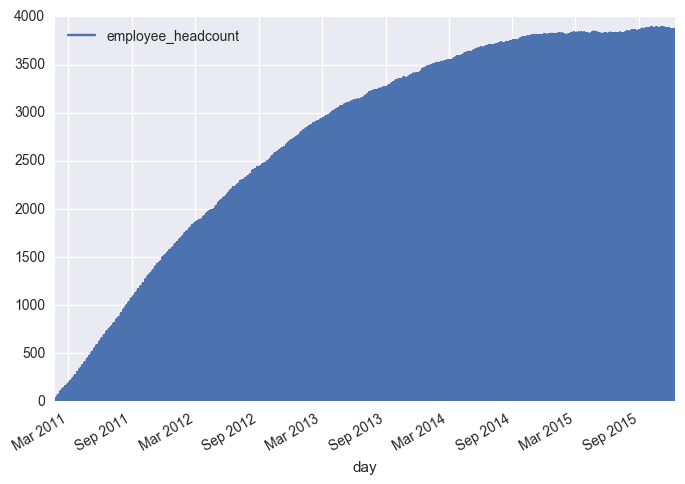

In [37]:
headcount_df.plot.line(x='day',y='employee_headcount', by='company_id')

In [38]:
headcount_byComp_df= pd.DataFrame()
headcount_byComp_df['day']= dates
for comp in companies:
    inds= (headcount_df.company_id == comp)
    headcount_byComp_df[comp]= headcount_df.loc[inds,'employee_headcount']

In [39]:
headcount_byComp_df.head()

,day,1,2,3,4,5,6,7,8,9,10,11,12
0,2011-01-23,0,0,0,0,0,0,0,0,0,0,0,0
1,2011-01-24,25,17,9,12,5,3,1,6,3,0,0,0
2,2011-01-25,27,19,10,12,5,3,1,6,3,0,0,0
3,2011-01-26,29,19,12,13,6,3,1,6,3,0,0,0
4,2011-01-27,29,19,12,13,6,3,1,6,3,0,0,0


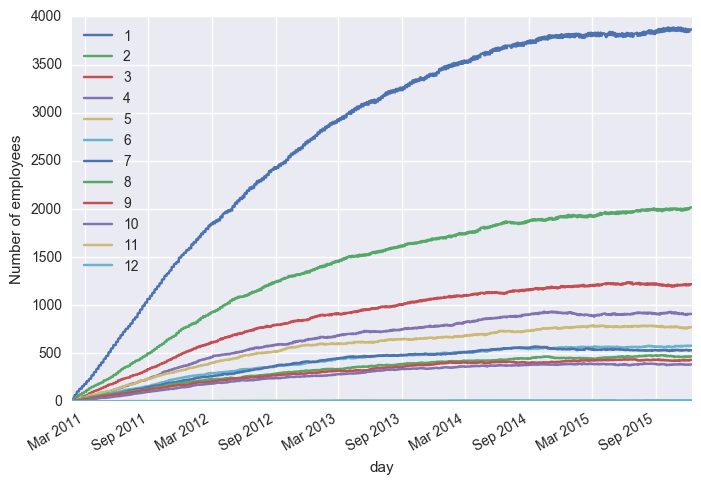

In [40]:
headcount_byComp_df.plot.line(x='day',y=companies, x_compat=True)
# headcount_byComp_df.plot.line(x='day',y=companies)
plt.ylabel('Number of employees')

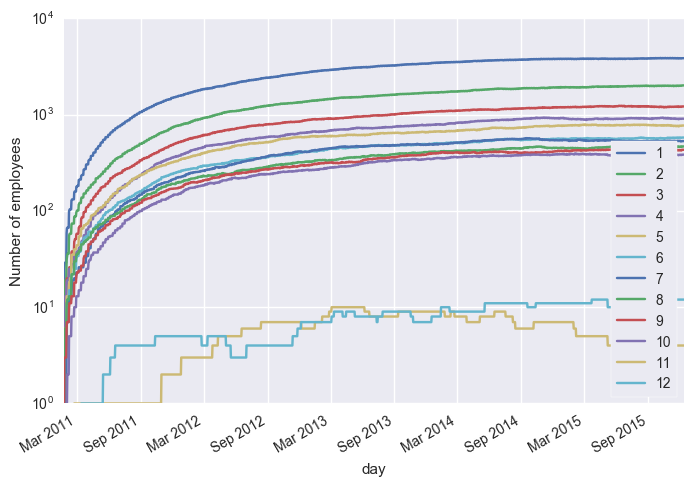

In [41]:
headcount_byComp_df.plot.line(x='day',y=companies, x_compat=True, logy=True)
plt.ylabel('Number of employees')
plt.legend(loc='best',frameon=True)

# 3) What are the main factors driving employee churn

In [42]:
indsEmployed= employee_df.quit_date.isnull()
indsQuit= np.logical_not(indsEmployed)

In [43]:
print '# that have quit:', np.sum(indsQuit)
print '# still employed:', np.sum(indsEmployed)

# that have quit: 13508
# still employed: 11192


In [44]:
tf= employee_df.quit_date
tf= tf.fillna(enddate)
tf.head()

0   2015-10-30
1   2014-04-04
2   2015-12-13
3   2013-06-07
4   2014-08-22
Name: quit_date, dtype: datetime64[ns]

In [45]:
length_employment= (tf - employee_df.join_date)

employee_df['length_employment']= [u.days for u in length_employment]
employee_df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,length_employment
0,13021,7,customer_service,28,89000,2014-03-24,2015-10-30,585
1,825355,7,marketing,20,183000,2013-04-29,2014-04-04,340
2,927315,4,marketing,14,101000,2014-10-13,NaT,426
3,662910,7,customer_service,20,115000,2012-05-14,2013-06-07,389
4,256971,2,data_science,23,276000,2011-10-17,2014-08-22,1040


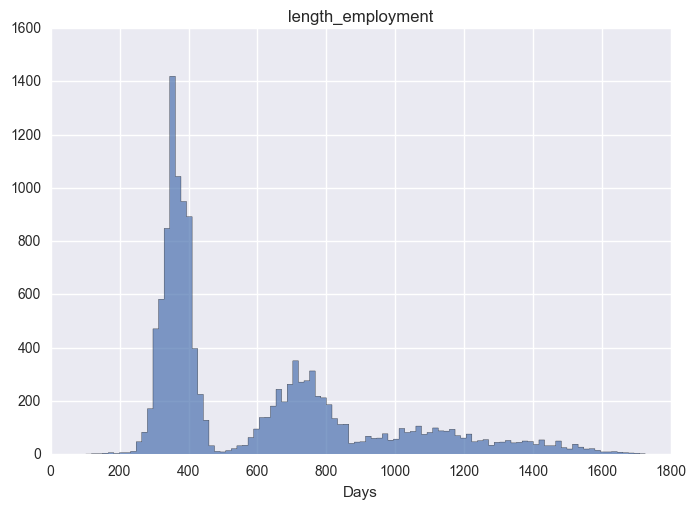

In [46]:
employee_df[indsQuit].hist(column='length_employment', bins=100, alpha=0.7, histtype='stepfilled');
plt.xlabel('Days')

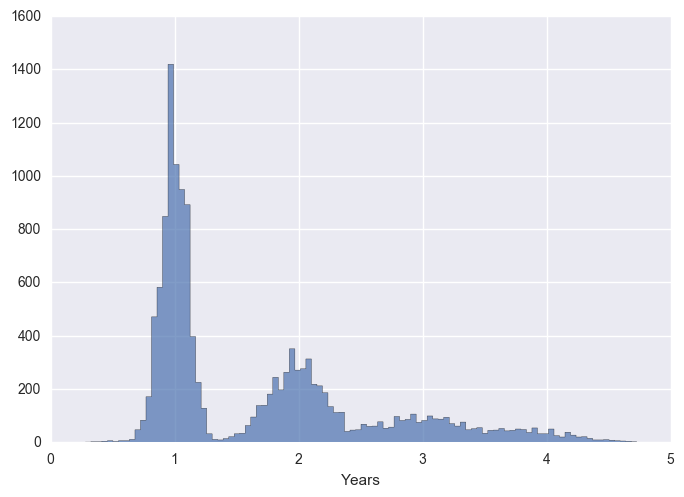

In [47]:
plt.hist(employee_df[indsQuit].length_employment/365.25,bins=100, alpha=0.7, histtype='stepfilled');
plt.xlabel('Years')

Seems like the length of employment is periodical, with peaks at 1, 2, and 3 year mark

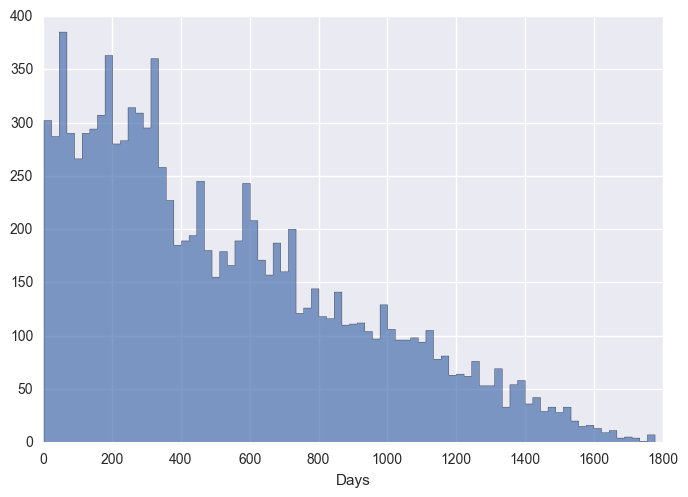

In [48]:
plt.hist(employee_df[indsEmployed].length_employment,bins=80, alpha=0.7, histtype='stepfilled');
plt.xlabel('Days')

No periodicity found in the length of employment for employees that have not quit

### Company

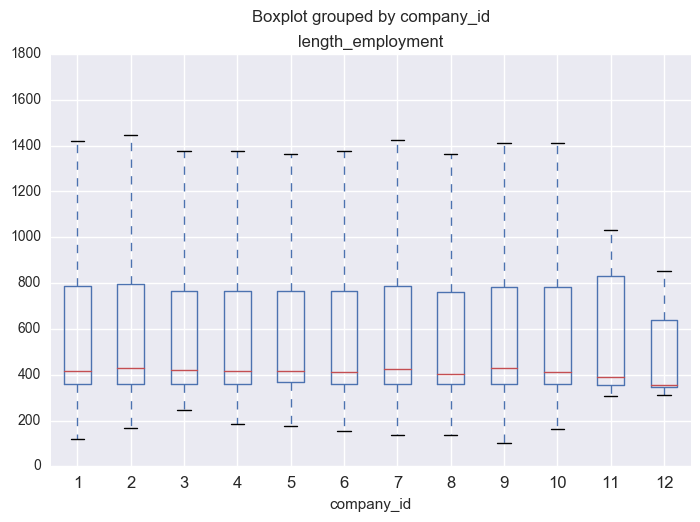

In [49]:
employee_df[indsQuit].boxplot(column='length_employment', by='company_id')

In [97]:
def errstd(values):
    return np.std(values,ddof=1)/np.sqrt(len(values))

In [98]:
mu= employee_df[indsQuit].groupby('company_id')['length_employment'].mean()
err= employee_df[indsQuit].groupby('company_id')['length_employment'].apply(errstd)

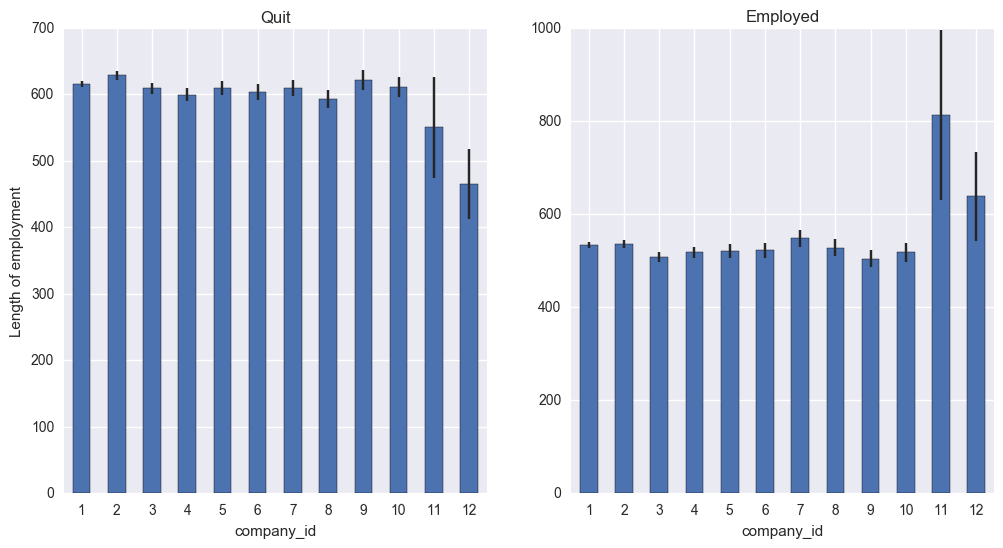

In [99]:
plt.figure(figsize=(12,6))
ax1=plt.subplot(121)
mu.plot(kind='bar', yerr=err, rot=True)
plt.ylabel('Length of employment')
plt.title('Quit')

ax2=plt.subplot(122)
employee_df[indsEmployed].groupby('company_id')['length_employment'].mean().plot(kind='bar', yerr=employee_df[indsEmployed].groupby('company_id')['length_employment'].apply(errstd), rot=True)
# plt.ylabel('Length of employment')
plt.title('Employed')

Not much of a difference on length of employment between the different companies

### Department

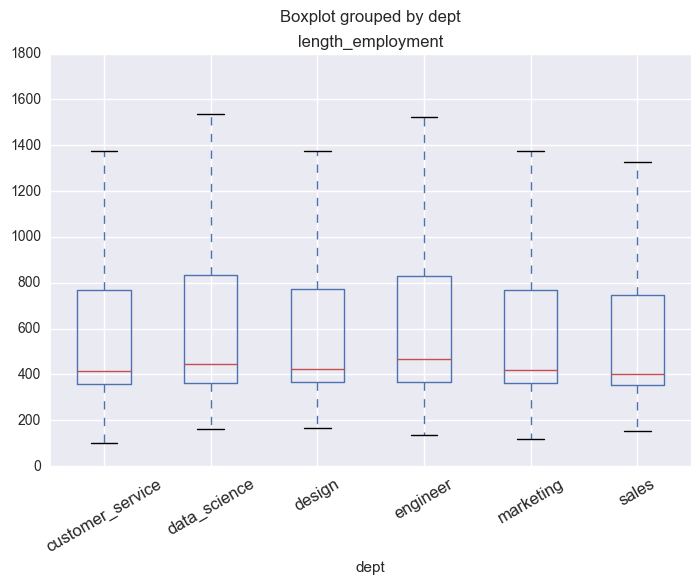

In [275]:
    employee_df[indsQuit].boxplot(column='length_employment', by='dept',rot=30)

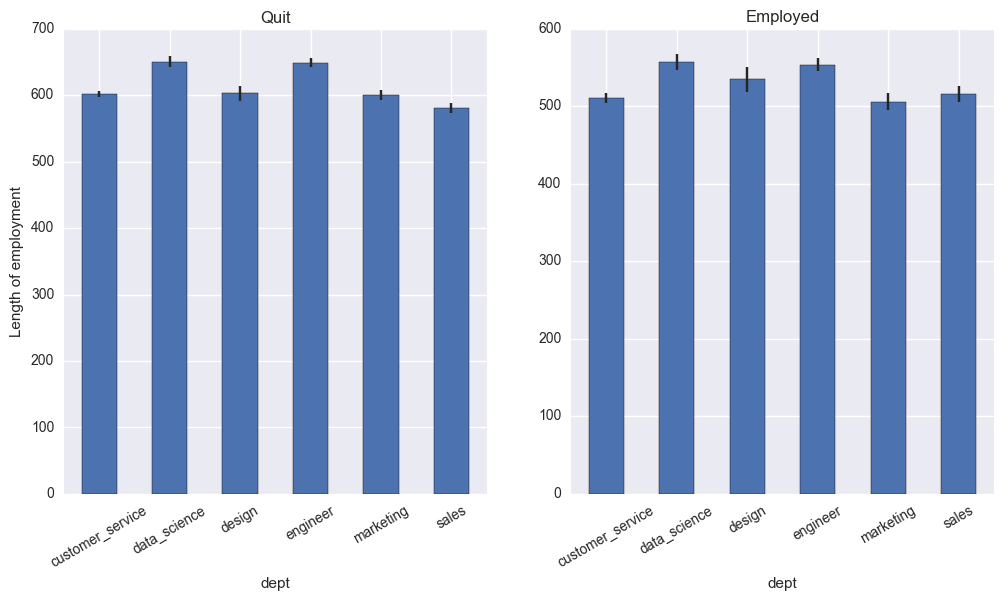

In [105]:
plt.figure(figsize=(12,6))
ax1=plt.subplot(121)
employee_df[indsQuit].groupby('dept')['length_employment'].mean().plot(kind='bar', yerr=employee_df[indsQuit].groupby('dept')['length_employment'].apply(errstd), rot=30)
plt.ylabel('Length of employment')
plt.title('Quit')

ax2=plt.subplot(122)
employee_df[indsEmployed].groupby('dept')['length_employment'].mean().plot(kind='bar', yerr=employee_df[indsEmployed].groupby('dept')['length_employment'].apply(errstd), rot=30)
# plt.ylabel('Length of employment')
plt.title('Employed')

Data science and Engineer departments seems to have slighly higher length of employment values

In [130]:
comp_pivot= employee_df[indsQuit].pivot_table(index='dept',columns='company_id',values='length_employment',aggfunc=np.mean)
comp_pivot

company_id,1,2,3,4,5,6,7,8,9,10,11,12
dept,,,,,,,,,,,,
customer_service,598.126456,585.052381,631.034862,609.291566,597.788732,595.148855,616.665428,579.917808,643.322581,613.673684,367.666667,400.0
data_science,679.146903,698.475836,608.958763,601.987578,628.631579,636.593023,605.255814,601.262500,638.126761,641.750000,693.000000,643.0
design,625.468401,660.833333,565.814815,619.049180,559.845070,604.577778,575.918919,511.250000,500.097561,558.347826,NaN,NaN
engineer,644.200535,708.020833,615.863014,643.081731,659.888889,618.775862,638.776000,644.038835,624.745283,640.376344,485.800000,312.0
marketing,604.822294,628.671186,597.897196,553.356688,591.771930,592.881356,587.181818,563.191176,647.612903,589.553571,843.500000,NaN
sales,583.964286,571.832192,574.009756,550.980132,597.818792,589.035294,588.948980,603.752941,591.571429,578.107692,NaN,592.0


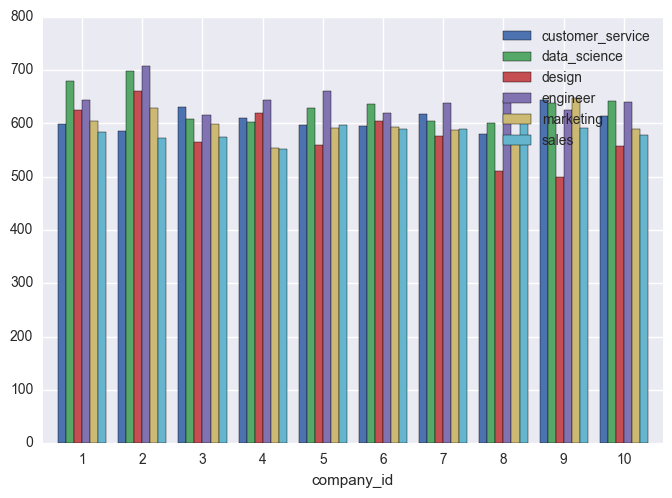

In [133]:
comp_pivot.loc[:,:10].transpose().plot(kind='bar',rot=True,width=.8)
plt.legend(loc='best')

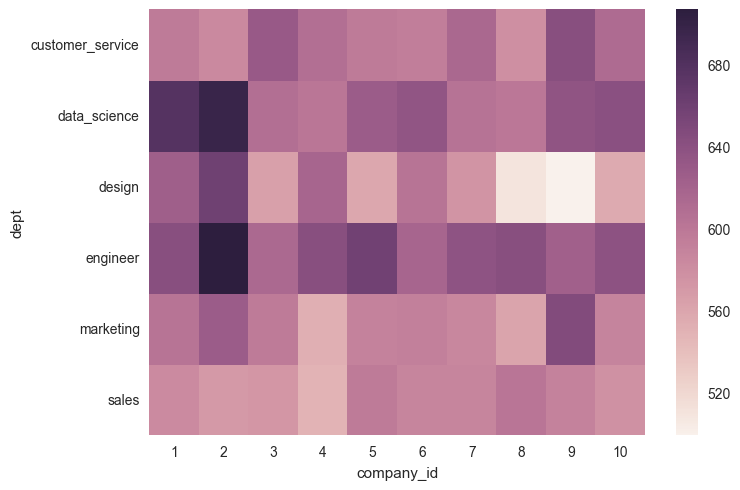

In [134]:
sns.heatmap(comp_pivot.loc[:,:10])

There seems to be some slight variation of the length of employment when considering the companies and department together

### Salary

In [158]:
slope, intercept, r, p, stderr = stats.linregress(employee_df[indsQuit].salary, employee_df[indsQuit].length_employment)
print r,p

0.0779398263209 1.17459781215e-19


(0, 2000.0)

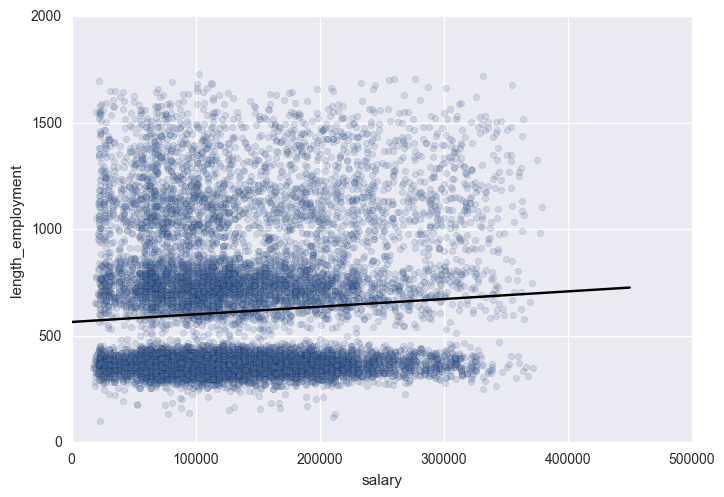

In [159]:
employee_df[indsQuit].plot(kind='scatter',x='salary',y='length_employment',alpha=0.2)
x= np.linspace(0,450000,11)
plt.plot(x,slope*x+intercept, c='k')
plt.plot()
plt.xlim(xmin=0)
plt.ylim(ymin=0)

Slight dependence on salary: the higher the salary, the higher the length of employment

### Seniority

In [160]:
slope, intercept, r, p, stderr = stats.linregress(employee_df[indsQuit].seniority, employee_df[indsQuit].length_employment)
print r,p

0.000829953150859 0.923161991572


(0, 2000.0)

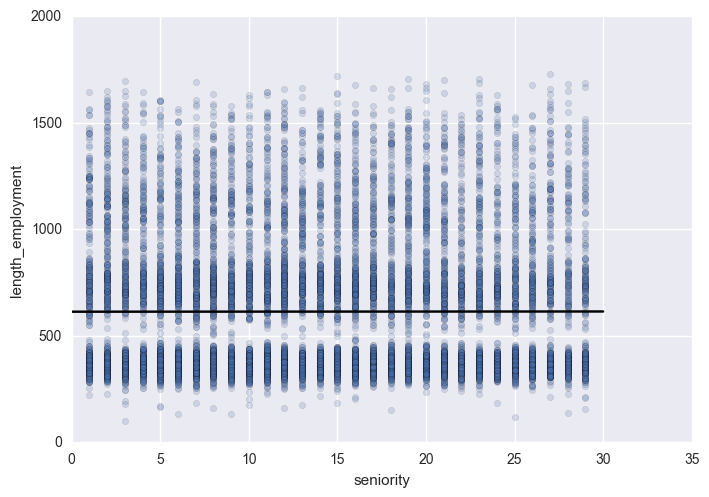

In [168]:
employee_df[indsQuit].plot(kind='scatter',x='seniority',y='length_employment',alpha=0.2)
x= np.linspace(0,30,11)
plt.plot(x,slope*x+intercept, c='k')
plt.plot()
plt.xlim(xmin=0)
plt.ylim(ymin=0)

(0, 30)

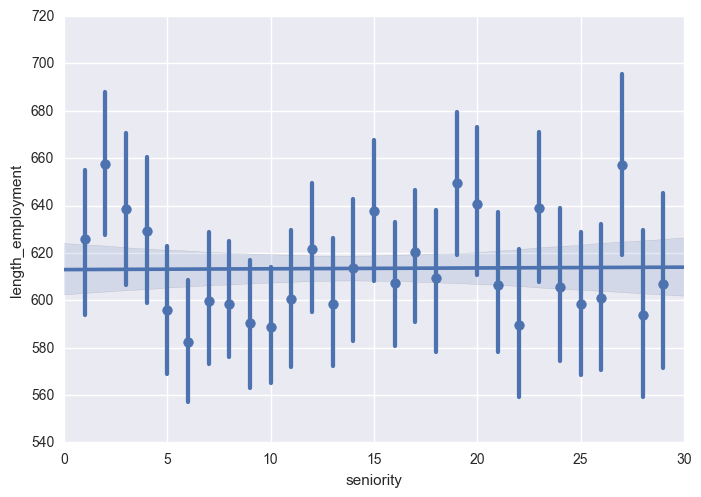

In [167]:
sns.regplot(x='seniority', y='length_employment', data=employee_df[indsQuit], x_estimator=np.mean)
plt.xlim(0,30)

No dependence on seniority observed

### Months of join and quit dates

In [251]:
employee_df['join_month']= [u.month for u in employee_df.join_date]
employee_df['quit_month']= [u.month for u in employee_df.quit_date]

In [260]:
employee_df.join_month.head()

0     3
1     4
2    10
3     5
4    10
Name: join_month, dtype: int64

In [259]:
employee_df.quit_month.head()

0    10.0
1     4.0
2     NaN
3     6.0
4     8.0
Name: quit_month, dtype: float64

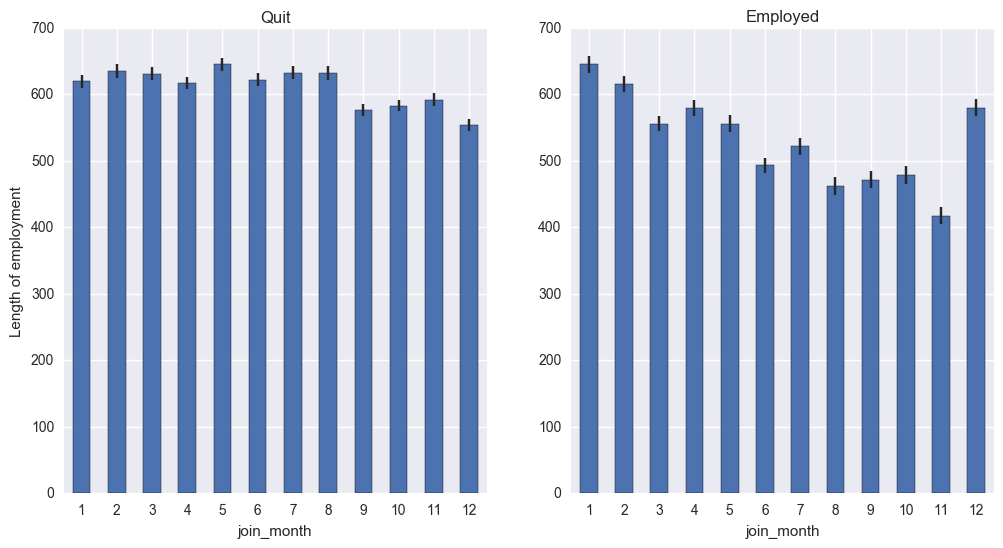

In [266]:
plt.figure(figsize=(12,6))
ax1=plt.subplot(121)
employee_df[indsQuit].groupby('join_month')['length_employment'].mean().plot(kind='bar', yerr=employee_df[indsQuit].groupby('join_month')['length_employment'].apply(errstd), rot=True)
plt.ylabel('Length of employment')
plt.title('Quit')

ax2=plt.subplot(122)
employee_df[indsEmployed].groupby('join_month')['length_employment'].mean().plot(kind='bar', yerr=employee_df[indsEmployed].groupby('join_month')['length_employment'].apply(errstd), rot=True)
# plt.ylabel('Length of employment')
plt.title('Employed')

Seems like employees who joined in the last 4 months of the year, have lower lengths of emplyment

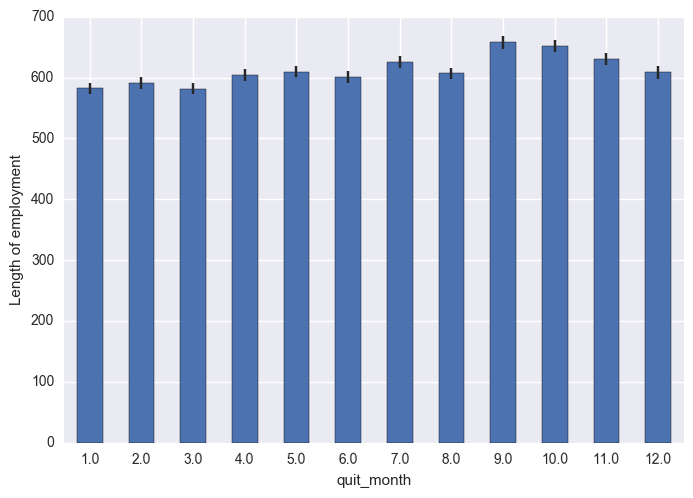

In [273]:
employee_df[indsQuit].groupby('quit_month')['length_employment'].mean().plot(kind='bar', yerr=employee_df[indsQuit].groupby('quit_month')['length_employment'].apply(errstd), rot=True)
plt.ylabel('Length of employment')

## Get model

In [112]:
# employee_df.to_csv('employee_data.csv',index=False, header=True)
employee_df = pd.read_csv('employee_data.csv', dtype={'employee_id': np.int64, 'salary': np.int64}, parse_dates=['join_date','quit_date'])

In [113]:
startdate= pd.datetime(2011,01,23)
enddate= pd.datetime(2015,12,13)
print startdate
print enddate

2011-01-23 00:00:00
2015-12-13 00:00:00


In [114]:
dates= pd.date_range(startdate, enddate, freq='M') + pd.tslib.Timedelta('1 day')
dates= dates[:-3]
dates

DatetimeIndex(['2011-02-01', '2011-03-01', '2011-04-01', '2011-05-01',
               '2011-06-01', '2011-07-01', '2011-08-01', '2011-09-01',
               '2011-10-01', '2011-11-01', '2011-12-01', '2012-01-01',
               '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01',
               '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01',
               '2012-10-01', '2012-11-01', '2012-12-01', '2013-01-01',
               '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01',
               '2013-06-01', '2013-07-01', '2013-08-01', '2013-09-01',
               '2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
               '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
               '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
               '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01'],
     

In [115]:
quit_df= pd.DataFrame()

quit_df['day']= np.concatenate([dates]*len(employee_df))
quit_df['employee_id']= np.concatenate([[u]*len(dates) for u in employee_df.employee_id])

In [116]:
quit_df= pd.merge(quit_df,employee_df.loc[:,[u'employee_id', u'company_id', u'dept', u'seniority', u'salary',
                             u'join_date', u'quit_date']], on='employee_id')

In [118]:
quit_df= pd.merge(quit_df,headcount_df, on=['day','company_id'])

In [120]:
quit_df['month']= [u.month for u in quit_df.day]

In [121]:
quit_df.head()

,day,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employee_headcount,month
0,2011-02-01,13021,7,customer_service,28,89000,2014-03-24,2015-10-30,7,2
1,2011-02-01,825355,7,marketing,20,183000,2013-04-29,2014-04-04,7,2
2,2011-02-01,662910,7,customer_service,20,115000,2012-05-14,2013-06-07,7,2
3,2011-02-01,932790,7,marketing,10,88000,2011-11-30,2013-11-22,7,2
4,2011-02-01,69693,7,customer_service,6,54000,2014-03-31,NaT,7,2


In [122]:
quit_df['days_employed']= [u.days for u in (quit_df.day - quit_df.join_date)]

Keep only the rows where the join_date comes after the day considered

In [123]:
quit_df= quit_df[quit_df['days_employed']>=0]

Get time until employee quits

In [217]:
days_until_quit_date= (quit_df.quit_date - quit_df.day)
indsNull= days_until_quit_date.isnull()

Set classification variable windicating if employee will quit in the next 90 / 180 days

In [241]:
quit_90D=[]
threshold= 90
for i,u in indsNull.iteritems():
#     print u ;
    if u:
        # Employee is still employed by the end of study
        temp_days= (enddate - quit_df.loc[i,'day']).days
        if temp_days >= threshold:
            # Employee has been employed for more than 90 days
            quit_90D.append(0)
        else:
            quit_90D.append(np.NaN)
    else:
        temp_days= days_until_quit_date[i].days
        if temp_days >= threshold:
            # employee is still employed within 90 days
            quit_90D.append(0)
        else:
            # employee has quit within 90 days
            quit_90D.append(1)            

In [240]:
quit_180D=[]
threshold= 180
for i,u in indsNull.iteritems():
#     print u ;
    if u:
        # Employee is still employed by the end of study
        temp_days= (enddate - quit_df.day[i]).days
        if temp_days >= threshold:
            # Employee has been employed for more than 180 days
            quit_180D.append(0)
        else:
#             print i, quit_df.day[i], temp_days
            quit_180D.append(np.NaN)
    else:
        temp_days= days_until_quit_date[i].days
        if temp_days >= threshold:
            # employee is still employed within 180 days
            quit_180D.append(0)
        else:
            # employee has quit within 180 days
            quit_180D.append(1)            

In [244]:
print np.min(enddate - quit_df.loc[quit_df.quit_date.isnull(),'join_date'])
print np.sum(enddate - quit_df.loc[quit_df.quit_date.isnull(),'day'] <= pd.tslib.Timedelta('180 days'))

103 days 00:00:00
28176


In [243]:
np.isnan(quit_180D).sum()

28176

In [246]:
quit_df['quit_90D']= quit_90D
quit_df['quit_180D']= quit_180D

In [256]:
quit_df= quit_df[np.logical_not(quit_df.quit_180D.isnull())]

In [262]:
quit_df.quit_180D= quit_df.quit_180D.astype(np.int64)

Fraction of data points that have quit within time considered

In [274]:
print ' 90 days:', 1.*np.sum(quit_df.quit_90D)/len(quit_df)
print '180 days:', 1.*np.sum(quit_df.quit_180D)/len(quit_df)

 90 days: 0.416258069432
180 days: 0.479537334068


In [276]:
quit_df.head()

,day,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employee_headcount,month,days_employed,quit_90D,quit_180D
98,2011-02-01,248794,7,engineer,24,268000,2011-01-31,2015-07-17,7,2,1,0,0
347,2011-02-01,368193,7,engineer,7,171000,2011-01-31,2012-11-09,7,2,1,0,0
538,2011-02-01,762629,7,customer_service,27,93000,2011-01-31,2012-10-05,7,2,1,0,0
594,2011-02-01,350664,7,engineer,18,249000,2011-01-24,2015-05-01,7,2,8,0,0
768,2011-02-01,130707,7,customer_service,9,54000,2011-01-31,2014-01-03,7,2,1,0,0


In [275]:
quit_df.columns

Index([               u'day',        u'employee_id',         u'company_id',
                     u'dept',          u'seniority',             u'salary',
                u'join_date',          u'quit_date', u'employee_headcount',
                    u'month',      u'days_employed',           u'quit_90D',
                u'quit_180D'],
      dtype='object')

In [341]:
# quit_df.to_csv('quit_data.csv',index=False, header=True)
quit_df = pd.read_csv('quit_data.csv')

In [342]:
data_df= quit_df[[u'seniority', u'salary', u'employee_headcount', u'month', u'days_employed',
                  u'quit_90D', u'quit_180D']]

In [343]:
X= data_df[[u'seniority', u'salary', u'employee_headcount', u'month', u'days_employed']]

y= data_df.quit_90D

Let's see what the database looks like

In [319]:
y.value_counts()

0    367758
1    262243
Name: quit_90D, dtype: int64

In [287]:
from sklearn import cross_validation, linear_model

/home/joao/anaconda2/envs/insight/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [288]:
logistic= linear_model.LogisticRegression()

In [289]:
cv = cross_validation.ShuffleSplit(len(y), n_iter=10, test_size=0.3)
scores_logistic = cross_validation.cross_val_score(logistic, X, y, cv=cv)

In [290]:
print scores_logistic.mean(), scores_logistic.std()

0.733863312893 0.00284358449408


Let's try better

In [292]:
from sklearn.preprocessing import OneHotEncoder

In [294]:
enc = OneHotEncoder(categorical_features=[False,False,False,True,False],sparse=False)

In [295]:
X_enc = enc.fit_transform(X)

In [303]:
X_enc[0]

array([  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.40000000e+01,   2.68000000e+05,   7.00000000e+00,
         1.00000000e+00])

In [329]:
X.head()

,seniority,salary,employee_headcount,month,days_employed
0,24,268000,7,2,1
1,7,171000,7,2,1
2,27,93000,7,2,1
3,18,249000,7,2,8
4,9,54000,7,2,1


In [344]:
X.columns

Index([u'seniority', u'salary', u'employee_headcount', u'month',
       u'days_employed'],
      dtype='object')

In [345]:
X= X.values
y= y.values

In [346]:
newX= X.astype(np.float)

In [349]:
newX[:,0]

array([ 24.,   7.,  27., ...,   3.,   9.,  10.])

In [350]:
columns = [0,1,2,4]
means= []
stds= []
for column in columns:
    mean_temp = newX[:,column].mean()
    std_temp = newX[:,column].std()
    means.append( mean_temp )
    stds.append( std_temp )
    newX[:,column] = (newX[:,column]-mean_temp)/std_temp

In [352]:
scores_logistic = cross_validation.cross_val_score(logistic,newX, y, cv=cv)

In [353]:
print scores_logistic.mean(), scores_logistic.std()

0.766035629441 0.00092852732227


# Consider company growth as a factor for employee churn

# Consider company churn rate as a factor for employee churn